In [1]:
import random
from math import *
import operator
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [5]:
# load the training data from iris.txt
df_training_iris = pd.read_csv(location )

In [6]:
#len(df_training_iris)
df_training_iris.shape[0]

150

In [7]:
%%time
# set the value of k number of neighbors to choose
k = 3

# how many samples of test data to be taken out from the training data
k_fold = 5

# initialize a dataframe to store the run results
df_k_fold_validation = pd.DataFrame(columns=['k_fold_run_no', 
                                             'no_incorrect_pred', 
                                             'accuracy_pct'])

# initialize a dataframe to save all the test run results
df_test_iris_results = pd.DataFrame()

# randomly shuffle the dataframe
df_training_iris = df_training_iris.reindex(np.random.permutation(df_training_iris.index))

# how many records in the test data
fraction = int(len(df_training_iris) / k_fold)
#fraction = 15

# For each k Fold 
for k_fold_ctr in range(k_fold):

    # Build test set 
    df_test_iris = df_training_iris[k_fold_ctr*fraction : k_fold_ctr*fraction+fraction]
 
    # Build Training set (removing the test set)
    index_end = k_fold_ctr*fraction
    df_training_iris_before  = df_training_iris[:index_end] 
    
    index_start = k_fold_ctr*fraction + fraction
    df_training_iris_after = df_training_iris[index_start:]  
 
    df_training_iris_net = pd.concat([df_training_iris_before, df_training_iris_after])
    
    df_training_iris_net = df_training_iris_net.reset_index(drop=True)
    df_test_iris = df_test_iris.reset_index(drop=True)
 
    # add a column for 'pred_class'
    df_test_iris['pred_class'] = ''
    
    df_training_iris_net['distance'] = 0
    
    # for each test sample
    for index_test, row_test in df_test_iris.iterrows():

        # for each row in the dataframe, calculate the distance
        for index, row in df_training_iris_net.iterrows():
            eucDist = sqrt(((float(row_test.sepal_length) - float(row['sepal_length'])) ** 2 +
                            (float(row_test.sepal_width) - float(row['sepal_width'])) ** 2 +
                            (float(row_test.petal_length) - float(row['petal_length'])) ** 2 +
                            (float(row_test.petal_width) - float(row['petal_width'])) ** 2))

            df_training_iris_net.loc[index, 'distance'] = eucDist
            
        # End for - distance calculation
        
        # sort on distance, ascending.
        df_training_iris_net.sort_values('distance', ascending=True, inplace=True)

        # select the first k rows, into a new df
        df_training_iris_k = df_training_iris_net.iloc[0:k, :].copy()

        # The resulting object will be in descending order so that the first element is the most 
        # frequently-occurring element. Excludes NA values by default.
        df_training_iris_k_grouped = df_training_iris_k['class'].value_counts()
        
        # get the first index of the resulting pandas series above (value_counts)
        pred_class = df_training_iris_k_grouped.index[0]

        # save the predicated class in the test data frame
        df_test_iris.at[index_test, 'pred_class'] = pred_class
        
    # End for - test class prediction
    # find the mismatch count of class predication
    no_mismatch_class = df_test_iris.loc[~(df_test_iris['pred_class'] == df_test_iris['class'])].shape[0]

    # accuracy of prediction
    accuracy_pct = 100-(no_mismatch_class/ df_test_iris.shape[0])*100

    print('k-fold run {:3d},'.format(k_fold_ctr), 'Accuracy = {:6.2f} %'.format(accuracy_pct))

    # save results into df_k_fold_validation
    # k_fold_ctr
    # accuracy %
    df_k_fold_validation.at[k_fold_ctr, 'k_fold_run_no'] = k_fold_ctr
    df_k_fold_validation.at[k_fold_ctr, 'no_incorrect_pred'] = no_mismatch_class
    df_k_fold_validation.at[k_fold_ctr, 'accuracy_pct'] = accuracy_pct

k-fold run   0, Accuracy =  96.67 %
k-fold run   1, Accuracy =  96.67 %
k-fold run   2, Accuracy =  96.67 %
k-fold run   3, Accuracy =  96.67 %
k-fold run   4, Accuracy =  96.67 %
Wall time: 11.3 s


In [8]:
df_k_fold_validation

,k_fold_run_no,no_incorrect_pred,accuracy_pct
0,0,1,96.6667
1,1,1,96.6667
2,2,1,96.6667
3,3,1,96.6667
4,4,1,96.6667


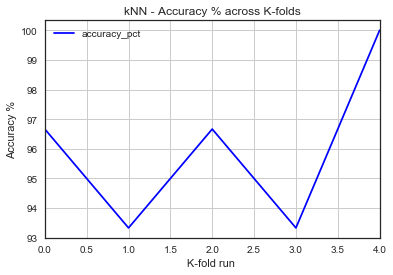

In [8]:
ax = df_k_fold_validation.plot(kind='line', 
        x='k_fold_run_no', 
        y='accuracy_pct', 
        figsize=(6,4),
        title= 'kNN - Accuracy % across K-folds',
        grid=True,
        legend=True,
        color='blue',
        
       );
# Set the x-axis label
ax.set_xlabel("K-fold run ")

# Set the y-axis label
ax.set_ylabel("Accuracy %");